Calcualte the rate of return for a portfiolo containing 4 companies GE, MSFT,Ford, PG from 2001 to currrent

In [8]:
import pandas as pd
import numpy as np 
from pandas_datareader import data as web
import matplotlib.pyplot as plt

In [2]:
tickers = ["MSFT", "F", "PG", "GE"]
data_frame = pd.DataFrame()
for t in tickers:
    data_frame[t] = web.DataReader(t, data_source = "yahoo", start = "2001-1-1")["Adj Close"]

In [3]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4750 entries, 2001-01-02 to 2019-11-18
Data columns (total 4 columns):
MSFT    4750 non-null float64
F       4750 non-null float64
PG      4750 non-null float64
GE      4750 non-null float64
dtypes: float64(4)
memory usage: 185.5 KB


In [5]:
#5 most recent trading days
data_frame.tail()

,MSFT,F,PG,GE
Date,,,,
2019-11-12,147.070007,9.04,119.269997,11.4200
2019-11-13,147.309998,8.81,120.650002,11.2900
2019-11-14,148.059998,8.79,120.500000,11.2900
2019-11-15,149.970001,8.95,120.540001,11.5200
2019-11-18,150.309998,8.93,121.839996,11.4001


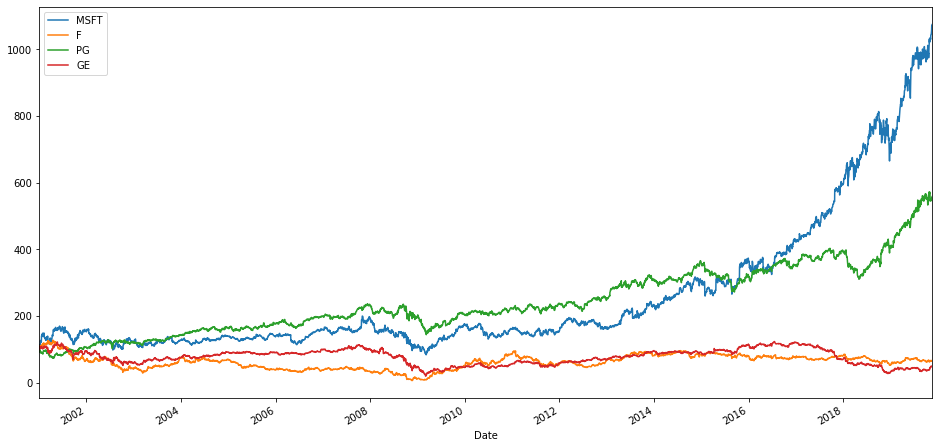

In [9]:
#lets notmalize the data to get a better understanding of the behavior of the portfolio securties 
(data_frame/data_frame.iloc[0] * 100).plot(figsize= (16,8))
plt.show()

In [10]:
# we can see that each security wads effected after the recession of  2008 and made a combac in 2009. 
#we can see that PG have a lead over MSFT from late 2002 into 2003 and then dropped below there after. 
#MSFT rthen passed PG in 2016.  We can also see that GE and Ford has somewhatof an inverse correlation.
#as one secirity moves up the other moves down except between 2014 - 2016

In [11]:
#lets calculate the simple return for the portfolio 
simple_return = (data_frame/data_frame.shift(1)) -1 
simple_return

,MSFT,F,PG,GE
Date,,,,
2001-01-02,NaN,NaN,NaN,NaN
2001-01-03,0.105188,0.033419,-0.049363,0.092857
2001-01-04,0.010430,0.072139,-0.030988,0.005229
2001-01-05,0.014194,-0.025522,0.036301,-0.015605
2001-01-08,-0.003817,-0.023809,0.021685,-0.036988
...,...,...,...,...
2019-11-12,0.006570,-0.004405,-0.000503,0.006167
2019-11-13,0.001632,-0.025442,0.011570,-0.011384
2019-11-14,0.005091,-0.002270,-0.001243,0.000000


In [12]:
simple_return.tail()

,MSFT,F,PG,GE
Date,,,,
2019-11-12,0.006570,-0.004405,-0.000503,0.006167
2019-11-13,0.001632,-0.025442,0.011570,-0.011384
2019-11-14,0.005091,-0.002270,-0.001243,0.000000
2019-11-15,0.012900,0.018202,0.000332,0.020372
2019-11-18,0.002267,-0.002235,0.010785,-0.010408


In [15]:
# we will calculate the annual return for each security ib the portfolio
annual_return = simple_return.mean() * 250

In [16]:
annual_return

MSFT    0.164144
F       0.062222
PG      0.106327
GE      0.010150
dtype: float64

In [17]:
#ccalculate the total return for the entire portfilio assuming the securities are all equal weighted
weights = np.array([0.25,0.25,0.25,0.25])
portfolio_returns = np.dot(annual_return, weights)

In [19]:
print(str(round(portfolio_returns, 3) * 100) + "%")

8.6%


The portfolio provides a 8.6% return for the period of 2001 to 2019